In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#reduced the data, as iterative imputer is very slow (due to too much calculations) and hence works well with less data
df = np.round(pd.read_csv('50_Startups.csv')[['R&D Spend','Administration','Marketing Spend','Profit']]/10000)
np.random.seed(9)
df = df.sample(5)
df

,R&D Spend,Administration,Marketing Spend,Profit
21,8.0,15.0,30.0,11.0
37,4.0,5.0,20.0,9.0
2,15.0,10.0,41.0,19.0
14,12.0,16.0,26.0,13.0
44,2.0,15.0,3.0,7.0


In [5]:
X = df[['R&D Spend', 'Administration', 'Marketing Spend']]
y = df['Profit']

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=10, random_state=0)
X_train_imputed = imp.fit_transform(X_train)
X_test_imputed = imp.transform(X_test)


In [9]:
X_train_imputed

array([[ 2., 15.,  3.],
       [15., 10., 41.],
       [ 8., 15., 30.],
       [12., 16., 26.]])

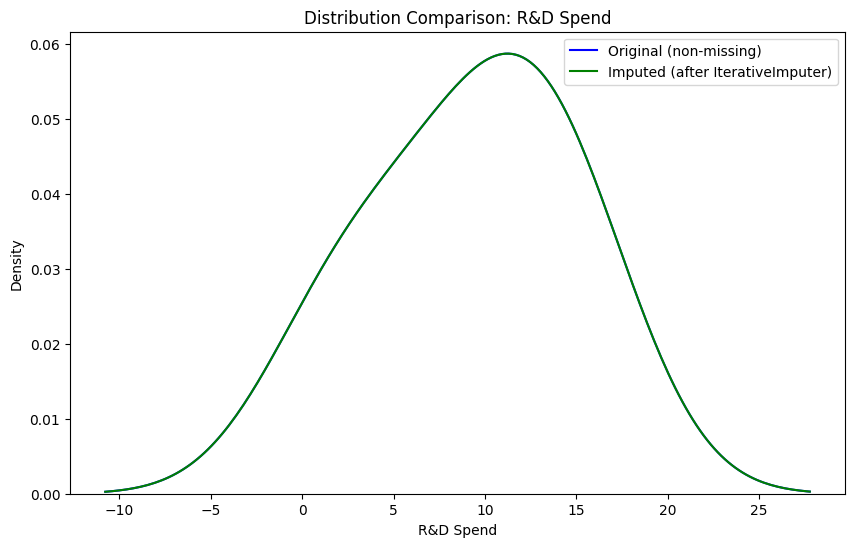

In [10]:
'''
checking through distribution if the iterative imputer worked correctly or not. if correct, then the distributions would completely
overlap as both would be the same.
'''

#as after transform, X_train_imputed is a numpy array, we need to convert it to df.
X_train_imputed_df = pd.DataFrame(X_train_imputed, columns=X_train.columns)

original_col = X_train['R&D Spend'].dropna() # non missing values.
imputed_col = X_train_imputed_df['R&D Spend'] #all values including imputed values.

# Plot
plt.figure(figsize=(10, 6))

sns.kdeplot(original_col.dropna(), label='Original (non-missing)', color='blue')
sns.kdeplot(imputed_col, label='Imputed (after IterativeImputer)', color='green')

plt.title('Distribution Comparison: R&D Spend')
plt.xlabel('R&D Spend')
plt.legend()
plt.show()